# __SARIMA for Demand Forecasting__

In [11]:
## Importing Libraries

import pandas as pd
import statsmodels.api as sm
import pickle
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [ ]:
## Constants

P = 1
Q = 2
D = 0
S = 52

In [6]:
## Load Data

def load_data(data_path, sales_col_title):
    df = pd.read_csv(data_path)
    data = pd.DataFrame()
    data['week'] = pd.to_datetime(df['week_start_date'])
    data['sales'] = df[sales_col_title]
    # data.set_index('week', inplace=True)
    return data

In [8]:
data = load_data(r'data\facewash.csv', 'facewash_sales')
data.head()

,week,sales
0,2021-01-04,320
1,2021-01-11,315
2,2021-01-18,325
3,2021-01-25,318
4,2021-02-01,330


In [9]:
def fit_sarimax(data):
    model = sm.tsa.statespace.SARIMAX(data['sales'], order=(1, 0, 2), seasonal_order=(1, 0, 2, 52))
    model_fit = model.fit()
    return model_fit

In [10]:
model_fit = fit_sarimax(data)

c:\Users\Akhil PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Akhil PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: >

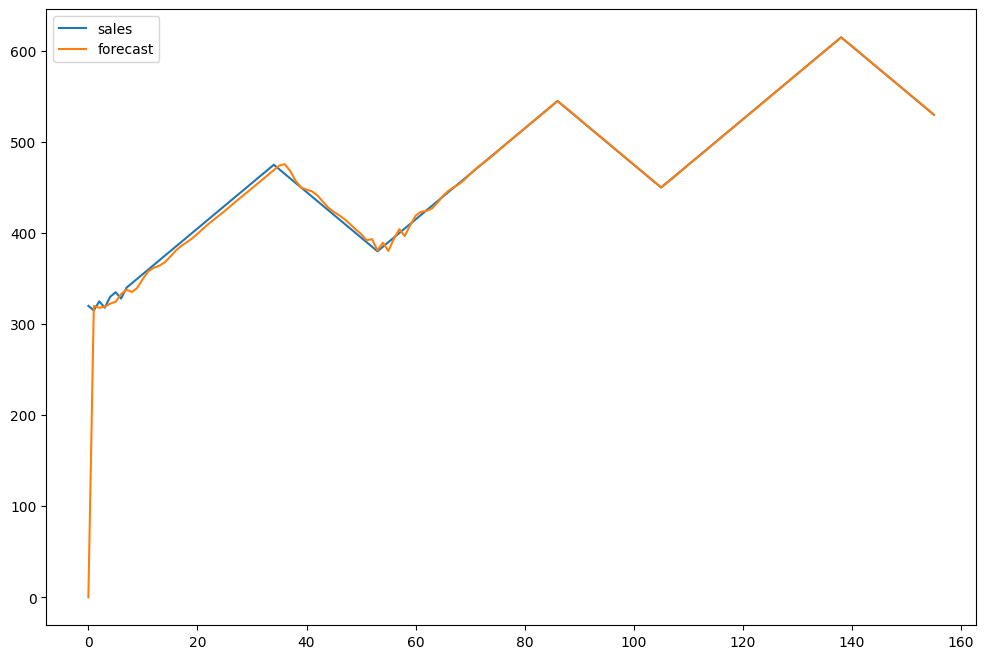

In [12]:
data['forecast'] = model_fit.predict(start=0, end=156)
data[['sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
# pickle.dump(model_fit, open('model.pkl', 'wb'))

In [ ]:
def train_model(data_path, sales_col_title):
    csv_name = data_path.split('/')[-1].split('.')[0]
    data = load_data(data_path, sales_col_title)
    model_fit = fit_sarimax(data)
    pickle.dump(model_fit, open(f'{csv_name}.pkl', 'wb'))

In [31]:
def predict_next_four_weeks(model: SARIMAXResults, start_date: str) -> pd.Series:

    start_date = pd.to_datetime(start_date)
    start_week = start_date.isocalendar()[1]
    end_week = start_week + 4

    predictions = model.predict(start=start_week, end=end_week)
    return list(predictions.values)

In [32]:

# Example usage:
start_date = '2024-05-11'
predictions = predict_next_four_weeks(model_fit, start_date)
print(predictions)

[394.03349830148187, 399.1331623506438, 404.6808851780758, 409.9393198099293, 414.7058742463775]
